In [1]:
import pandas as pd
from math import sqrt
from sklearn import linear_model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score

import seaborn as sns
import matplotlib.pyplot as plt

# Bike Rentals

In [2]:
df2 = pd.read_excel('bike_rentals.xlsx')
df2.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,349,2011-12-15,4,0,12,0,4,1,2,0.422500,0.412237,0.634167,0.268042,3709
1,163,2011-06-12,2,0,6,0,0,0,1,0.692500,0.643325,0.747917,0.163567,4460
2,358,2011-12-24,1,0,12,0,6,0,1,0.302500,0.299242,0.542500,0.190304,1011
3,419,2012-02-23,1,1,2,0,4,1,1,0.454167,0.444446,0.554583,0.190913,5062
4,282,2011-10-09,4,0,10,0,0,0,1,0.540833,0.523983,0.727500,0.063450,5511


In [3]:
df2.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     499 non-null    int64         
 1   dteday      499 non-null    datetime64[ns]
 2   season      499 non-null    int64         
 3   yr          499 non-null    int64         
 4   mnth        499 non-null    int64         
 5   holiday     499 non-null    int64         
 6   weekday     499 non-null    int64         
 7   workingday  499 non-null    int64         
 8   weathersit  499 non-null    int64         
 9   temp        499 non-null    float64       
 10  atemp       499 non-null    float64       
 11  hum         499 non-null    float64       
 12  windspeed   499 non-null    float64       
 13  cnt         499 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage: 54.7 KB


In [5]:
df2 = df2.drop('instant', 1)

In [6]:
df2['dteday'] = df2['dteday'].dt.day

In [7]:
df2

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,15,4,0,12,0,4,1,2,0.422500,0.412237,0.634167,0.268042,3709
1,12,2,0,6,0,0,0,1,0.692500,0.643325,0.747917,0.163567,4460
2,24,1,0,12,0,6,0,1,0.302500,0.299242,0.542500,0.190304,1011
3,23,1,1,2,0,4,1,1,0.454167,0.444446,0.554583,0.190913,5062
4,9,4,0,10,0,0,0,1,0.540833,0.523983,0.727500,0.063450,5511
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,1,2,1,4,0,0,0,2,0.425833,0.417287,0.676250,0.172267,6041
495,1,2,0,5,0,0,0,2,0.451667,0.448204,0.762083,0.106354,3351
496,2,3,1,9,0,0,0,2,0.696667,0.649000,0.815000,0.064071,5810
497,27,1,0,2,0,0,0,1,0.343478,0.351109,0.680000,0.125248,2402


### Predict count column using Regression models

In [8]:
X_train = df2.drop('cnt', 1)
y_train = df2['cnt']

In [9]:
df22 = pd.read_excel('bike_rentals.xlsx', sheet_name = 'test')
df22.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,67,2011-03-08,1,0,3,0,2,1,1,0.292500,0.302400,0.420833,0.120650,2133
1,221,2011-08-09,3,0,8,0,2,1,1,0.775000,0.724121,0.570417,0.151121,4602
2,29,2011-01-29,1,0,1,0,6,0,1,0.196522,0.212126,0.651739,0.145365,1098
3,354,2011-12-20,4,0,12,0,2,1,2,0.385833,0.396454,0.595417,0.061571,3750
4,66,2011-03-07,1,0,3,0,1,1,1,0.261739,0.238461,0.551304,0.341352,1872


In [10]:
df22['dteday'] = df22['dteday'].dt.day
df22 = df22.drop('instant', 1)

In [11]:
X_test = df22.drop('cnt', 1)
y_test = df22['cnt']

**Linear Regression raw dataset** 

In [12]:
lr_model = linear_model.LinearRegression()

lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

print('RMSE:', sqrt(mean_squared_error(y_test, y_pred)))
print('score' , str(r2_score(y_test.to_numpy(), y_pred)))

RMSE: 816.7379685588871
score 0.7982339659463457


# Churn dataset (classification model)

In [15]:
df1 = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
df1.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
df1.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**Preprocessing**

Identify categorical values in columns

In [18]:
#one-hot
df1['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [19]:
#one-hot
df1['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [20]:
#one-hot
df1['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [21]:
#one-hot
df1['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [22]:
#replace to NO, one-hot
df1['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [23]:
#dummy variables
df1['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [24]:
#replace to NO, one-hot
df1['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [25]:
#replace to NO, one-hot
df1['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [26]:
#replace to NO, one-hot
df1['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [27]:
#replace to NO, one-hot
df1['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [28]:
#replace to NO, one-hot
df1['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [29]:
#replace to NO, one-hot
df1['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [30]:
#dummy variables
df1['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [31]:
#one-hot
df1['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [32]:
#dummy variables, rename
df1['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [33]:
df1['TotalCharges'].replace(' ', 0, inplace=True)

In [34]:
df1['TotalCharges'] = df1['TotalCharges'].astype(float)

In [35]:
df1['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [36]:
df1['MultipleLines'].replace('No phone Service', 'No', inplace=True)
df1['OnlineSecurity'].replace('No internet Service', 'No', inplace=True)
df1['DeviceProtection'].replace('No internet Service', 'No', inplace=True)
df1['TechSupport'].replace('No internet Service', 'No', inplace=True)
df1['StreamingTV'].replace('No internet Service', 'No', inplace=True)
df1['StreamingMovies'].replace('No internet Service', 'No', inplace=True)

In [37]:
df1['Churn'].replace('Yes', 1, inplace=True)
df1['Churn'].replace('No', 0, inplace=True)

**Get dummies**

In [38]:
df1 = df1.drop('customerID', 1)
df1 = pd.get_dummies(df1)

In [39]:
df1

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1


In [40]:
df1.dtypes

SeniorCitizen                                int64
tenure                                       int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
gender_Female                                uint8
gender_Male                                  uint8
Partner_No                                   uint8
Partner_Yes                                  uint8
Dependents_No                                uint8
Dependents_Yes                               uint8
PhoneService_No                              uint8
PhoneService_Yes                             uint8
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
OnlineSecurity_No              

**Logistic Regression model with roc_auc_score**

In [41]:
from sklearn.linear_model import LogisticRegression
X = df1.drop('Churn', 1)
y = df1['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

clf = LogisticRegression(solver="liblinear", random_state=0).fit(X, y)

roc_auc_score(y, clf.decision_function(X))

0.8472990130716966

In [42]:
y_pred = clf.predict(X_test)
roc_auc_score(y_test, y_pred)

0.7422219731804669

In [43]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[1381  158]
 [ 237  337]]


**AdaBoostClassifier**

In [44]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train,y_train)
preds = model.predict(X_test)
roc_auc_score(y_test, preds)

0.7153079174902024

**Standardtization**

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_st = scaler.fit_transform(X)

In [46]:
X_train, X_test, y_train, y_test = train_test_split( X_st,y, test_size=0.3, random_state=42)

clf = LogisticRegression(solver="liblinear", random_state=0).fit(X, y)
y_pred = clf.predict(X_test)
roc_auc_score(y_test, y_pred)

0.7510657855116563

**KNeighborsClassifier**

In [47]:
KNN_model_default = KNeighborsClassifier()
KNN_model_default.fit(X_train, y_train)
y_pred_KNN_default =KNN_model_default.predict(X_test)

In [48]:
roc_auc_score(y_test, y_pred_KNN_default)

0.6780495728933897

**For Logistic Regression Higher score**

For above dataset, creating KNN model with k-neighbors from 1 to 101 with step size 2 (1, 3, 5, ..., 99, 101). Then crating bias-variance tradeoff plot (for train and test), in order to choose the best K.

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train) 
score2 = knn.score(X_test, y_test)
print(score2) #score

0.7482252721249408


In [51]:
import numpy as np
KNN = np.arange(1, 102, 2)
accuracy_train, accuracy_test = [], []

for i in KNN:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_train = knn.predict(X_train)
    pred_test = knn.predict(X_test)
    accuracy_train.append(accuracy_score(y_train, pred_train))
    accuracy_test.append(accuracy_score(y_test, pred_test))
    
acc_df = pd.DataFrame({'knn':KNN, 'train_acc':accuracy_train, 'test_acc':accuracy_test})

In [52]:
acc_df = acc_df.melt(id_vars = 'knn', var_name = 'train/test', value_name = 'accuracy')
acc_df

,knn,train/test,accuracy
0,1,train_acc,0.999594
1,3,train_acc,0.855984
2,5,train_acc,0.831643
3,7,train_acc,0.816836
4,9,train_acc,0.813387
...,...,...,...
97,93,test_acc,0.792712
98,95,test_acc,0.791292
99,97,test_acc,0.791292
100,99,test_acc,0.790819


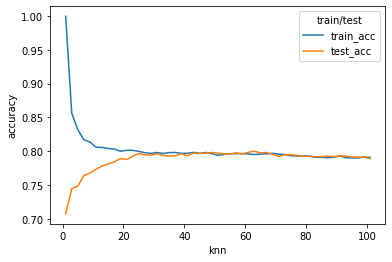

In [53]:
sns.lineplot(data = acc_df, x = 'knn', y = 'accuracy', hue = 'train/test')
plt.show()

In [54]:
acc_df.sort_values(by='accuracy')
acc_df.iloc[0]

knn                   1
train/test    train_acc
accuracy       0.999594
Name: 0, dtype: object

K = 1, best accuracy score